圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


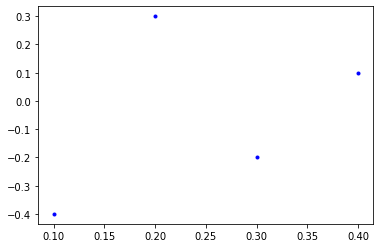

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)
plt.plot(np.real(gamma_points[:]),np.imag(gamma_points[:]),'b.')


print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


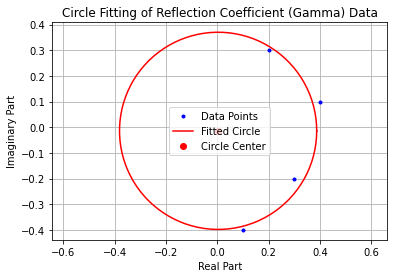

圓心座標（對應反射係數）：(0.0024675166832873463-0.013930546442361406j)
圓半徑：0.38415275057831527
駐波比（SWR）：1.0287008303693401
負載阻抗（ZL）：50.23 + j-1.40 歐姆


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from circle_fit import taubinSVD

# 假設有一組複數反射係數數據點
gamma_points = np.array([
    0.2 + 0.3j,
    0.4 + 0.1j,
    0.3 - 0.2j,
    0.1 - 0.4j
])

# 將複數數據點轉換為實數平面上的點
points = np.column_stack((gamma_points.real, gamma_points.imag))

# 使用 Taubin SVD 方法進行圓擬合
xc, yc, r, sigma = taubinSVD(points)

# 計算圓心對應的反射係數
gamma_center = complex(xc, yc)

# 計算駐波比（SWR）
SWR = (1 + abs(gamma_center)) / (1 - abs(gamma_center))

# 計算對應的負載阻抗（假設系統特徵阻抗 Z0 = 50 歐姆）
Z0 = 50
ZL = Z0 * (1 + gamma_center) / (1 - gamma_center)

# 繪製原始數據點
plt.plot(np.real(gamma_points[:]), np.imag(gamma_points[:]), 'b.', label='Data Points')

# 繪製擬合的圓
theta = np.linspace(0, 2*np.pi, 100)
x = xc + r * np.cos(theta)
y = yc + r * np.sin(theta)
plt.plot(x, y, 'r-', label='Fitted Circle')

# 標記圓心
plt.plot(xc, yc, 'ro', label='Circle Center')

# 圖形設置
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Circle Fitting of Reflection Coefficient (Gamma) Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print(f"圓心座標（對應反射係數）：{gamma_center}")
print(f"圓半徑：{r}")
print(f"駐波比（SWR）：{SWR}")
print(f"負載阻抗（ZL）：{ZL.real:.2f} + j{ZL.imag:.2f} 歐姆")


## 試試看用S11化緣!!


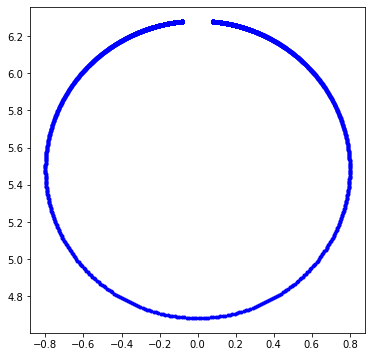

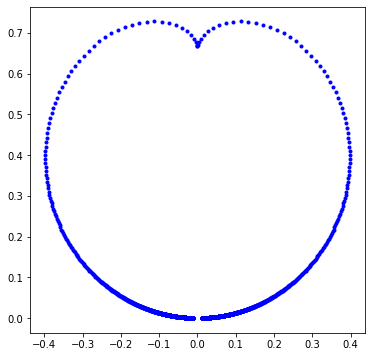

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def s11( omega, omega_m, alpha, kappa):
    Gamma = 2*np.pi*(alpha + kappa )/ 2
    s11 =( 1 - (kappa / (Gamma - 1j*(omega - omega_m))))*2*np.pi
    return s11

def s21( omega, omega_c, omega_m, kappa, alpha, beta, gamma):
    S_21 = - kappa / (1j*(omega - omega_c)-(kappa+beta)+ gamma**2/(1j*(omega - omega_m)-alpha) )
    return (S_21)

omega = np.linspace(-0.5, 0.5, 5000)  #(GHz)
omega_m = 0
omega_c = 0 
kappa = 0.0064 #(GHz)
alpha = 0.0016 #(GHz)
beta =  0.0016 #(GHz)
gamma =  0.0016 #(GHz)

data = s11( omega, omega_m, alpha, kappa)
data_2 = s21(omega, omega_c, omega_m, kappa, alpha, beta, gamma)

plt.figure(figsize=(6,6))
plt.plot(data.imag, data.real, 'b.')

plt.figure(figsize=(6,6))
plt.plot(data_2.imag, data_2.real, 'b.')




C:\Users\user\AppData\Local\Temp\ipykernel_52708\1409614204.py:53: RuntimeWarning: divide by zero encountered in true_divide
  1j * ((omega - omega_d) * g**2 + (omega - omega_m) * g_c**2 + 2 * g * g_c * g_d) /
C:\Users\user\AppData\Local\Temp\ipykernel_52708\1409614204.py:53: RuntimeWarning: invalid value encountered in true_divide
  1j * ((omega - omega_d) * g**2 + (omega - omega_m) * g_c**2 + 2 * g * g_c * g_d) /
C:\Users\user\AppData\Local\Temp\ipykernel_52708\1409614204.py:51: RuntimeWarning: invalid value encountered in true_divide
  S21 = -c.damp / (
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\user\AppData\Local\Temp\ipykernel_52708\1409614204.py:37: RuntimeWarning: divide by zero encountered in true_divide
  S21 = - c.damp/(1j*(omega - omega_c)+1j*((omega - omega_d)*g**2

treu: 0.00e+00-2.51e+06j, 1.51e+08, 6.16e+07, 6.28e+05
fitting: [0.00000000e+00 1.50796447e+08 1.50796447e+08 0.00000000e+00]


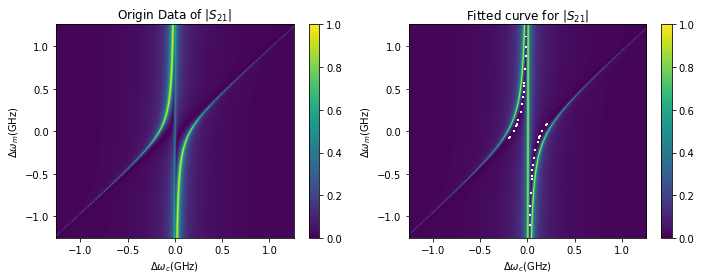

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math
#from matplotlib.animation import FuncAnimation
from scipy.optimize import curve_fit

pi = math.pi

class subsystem:

    def __init__(self, name , damp):
        self.name = name
        self.damp = damp

#coupling strength
Num = 1
g_0 = 2*pi*9.8*10**6
g = 2*pi*24*10**6 #(MHz)
g_c = 2*pi*0.1e6
g_d = g_0

a = subsystem('magnon', 2*pi*0.8*10**6)
b = subsystem('pump induce magnon', 2*pi*0.4*10**6)
c = subsystem('cavity photon', 2*pi*2.33*10**6)

omega = 2 * math.pi * np.linspace(-0.2*10**9, 0.2*10**9, 401)
omega_m = 2 * math.pi * np.linspace(-0.2*10**9, 0.2*10**9, 301)
omega_c = 0  - 1j*c.damp
omega_d = 0  - 1j*b.damp

# Create a meshgrid for omega and omega_k
omega, omega_m = np.meshgrid(omega, omega_m)

# Define the S21 function initially as a complex number
def S21_value(omega_group, omega_d , g , g_d , g_c ):
    omega, omega_m = omega_group
    S21 = - c.damp/(1j*(omega - omega_c)+1j*((omega - omega_d)*g**2 + (omega - omega_m)*g_c**2 + 2*g*g_c*g_d)/(g_d**2 - (omega - omega_d)*(omega - omega_m)))
    return (S21)

S21 = S21_value((omega , omega_m) , omega_d , g , g_d , g_c )

# Flatten the data for fitting
omega_flat = omega.ravel()
omega_m_flat = omega_m.ravel()
S21_flat_real = np.real(S21).ravel()  # 提取實部
S21_flat_imag = np.imag(S21).ravel()  # 提取虛部

# use curve_fit to fitting data in real part and image part simultaneously!
def S21_value_real_imag(omega_group, omega_d, g, g_d, g_c):
    omega, omega_m = omega_group
    S21 = -c.damp / (
        1j * (omega - omega_c) +
        1j * ((omega - omega_d) * g**2 + (omega - omega_m) * g_c**2 + 2 * g * g_c * g_d) /
        (g_d**2 - (omega - omega_d) * (omega - omega_m))
    )
    # 分別返回實部和虛部
    return np.hstack([np.real(S21).ravel(), np.imag(S21).ravel()])

# 使用 curve_fit 進行擬合
popt, pcov = curve_fit(
    S21_value_real_imag,
    (omega_flat, omega_m_flat),
    np.hstack([S21_flat_real, S21_flat_imag]),  # 拼接實部與虛部作為目標數據
    p0=[0, g, g, 0]
)



omega1 = 2 * math.pi * np.linspace(-0.2*10**9, 0.2*10**9, 1001)
omega_m1 = 2 * math.pi * np.linspace(-0.2*10**9, 0.2*10**9, 1001)
omega1, omega_m1 = np.meshgrid(omega1, omega_m1) # Create meshgrid for omega1 and omega_m1
S21_fit = S21_value((omega1, omega_m1), *popt)

#plot fitting and orignal
#plot fitting and orignal
print(f'treu: {omega_d:.2e}, {g:.2e}, {g_d:.2e}, {g_c:.2e}')
print(f'fitting: {popt}')
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(S21), extent=[omega.min()/10**9, omega.max()/10**9, omega_m.min()/10**9, omega_m.max()/10**9],vmin=0, vmax=1, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Origin Data of $|S_{21}|$')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(S21_value((omega1, omega_m1), *popt)), extent=[omega1.min()/10**9, omega1.max()/10**9, omega_m1.min()/10**9, omega_m1.max()/10**9],vmin=0, vmax=1, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('$\Delta\omega_c$(GHz)')
plt.ylabel('$\Delta\omega_m$(GHz)')
plt.title('Fitted curve for $|S_{21}|$')

plt.tight_layout()
plt.show()